In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [24]:
base_url = "http://www.spc.noaa.gov/wcm/data/"

years = ["2010","2011","2012","2013","2014","2015","2016"]
types = ['torn','hail','wind']

source_headings = {
    'torn':['om', 'yr', 'mo', 'dy', 'date', 'time', 'tz', 'st', 'stf', 'stn', 'mag',
           'inj', 'fat', 'loss', 'closs', 'slat', 'slon', 'elat', 'elon', 'len',
           'wid', 'ns', 'sn', 'sg', 'f1', 'f2', 'f3', 'f4', 'fc'],
    'hail':['om','yr','mo','dy','date','time','tz','st','stf','stn','mag',
            'inj','fat','loss','closs','slat','slon','elat','elon','len',
            'wid','ns','sn','sg','f1','f2','f3','f4'],
    'wind':['om','yr','mo','dy','date','time','tz','st','stf','stn','mag',
            'inj','fat','loss','closs','slat','slon','elat','elon','len',
            'wid','ns','sn','sg','f1','f2','f3','f4','mt']
}

filtered_columns = ["yr","mo","dy","date","time","st","mag","inj","fat","loss","closs","slat","slon"]

In [25]:
entire_df = pd.DataFrame()

for year in years:
    for weather_type in types:
        url = base_url+''+year+'_'+weather_type+'.csv'
        df = pd.read_csv(url, header=None)
        df.columns = source_headings[weather_type]
        df = df[filtered_columns]
        df = df.set_index('yr')
        df = df.drop(['yr'])
        df = df.reset_index()
        df['type'] = weather_type
        entire_df = entire_df.append(df)
        print(df.head())

     yr mo  dy        date      time  st mag inj fat  loss closs     slat  \
0  2010  1  18  2010-01-18  17:24:00  CA   0   0   0   0.0   0.0    36.73   
1  2010  1  19  2010-01-19  12:32:00  CA   0   0   0   0.0   0.0  34.4248   
2  2010  1  19  2010-01-19  14:55:00  CA   1   0   0   0.5   0.0   33.716   
3  2010  1  20  2010-01-20  15:27:00  LA   0   0   0   0.0   0.0   30.815   
4  2010  1  20  2010-01-20  16:26:00  TX   1   0   0  0.04   0.0  31.5095   

       slon  type  
0   -119.86  torn  
1  -119.877  torn  
2  -118.125  torn  
3  -92.0455  torn  
4  -93.9232  torn  
     yr  mo  dy        date      time  st   mag  inj  fat  loss  closs  \
0  2010  12  31  2010-12-31  22:40:00  MS  1.75    0    0   0.0    0.0   
1  2010  12  31  2010-12-31  22:25:00  MS  1.75    0    0   0.0    0.0   
2  2010  12  31  2010-12-31  22:20:00  MS  1.75    0    0   0.0    0.0   
3  2010  12  31  2010-12-31  22:20:00  MS  1.00    0    0   0.0    0.0   
4  2010  12  31  2010-12-31  21:50:00  AR  1.00

     yr  mo  dy        date      time  st  mag  inj  fat  loss  closs  \
0  2014   1   9  2014-01-09  17:19:00  FL   70    0    0  0.15    0.0   
1  2014   1  11  2014-01-11  05:18:00  AL   50    0    0  0.00    0.0   
2  2014   1  11  2014-01-11  05:53:00  GA   70    0    0  0.11    0.0   
3  2014   1  11  2014-01-11  06:15:00  AL   55    0    0  0.00    0.0   
4  2014   1  11  2014-01-11  06:20:00  AL   50    0    0  0.00    0.0   

      slat     slon  type  
0  27.0717 -80.1382  wind  
1  33.7223 -85.8386  wind  
2  34.0300 -85.2500  wind  
3  32.6100 -86.5500  wind  
4  32.4700 -86.6200  wind  
     yr mo dy        date      time  st mag inj fat   loss closs     slat  \
0  2015  1  3  2015-01-03  14:05:00  MS   0   0   0  0.001   0.0    31.43   
1  2015  1  3  2015-01-03  14:36:00  MS   1   0   0   0.02   0.0    31.68   
2  2015  1  3  2015-01-03  14:39:00  MS   1   0   0   0.04   0.0     31.7   
3  2015  1  3  2015-01-03  15:04:00  MS   2   0   0  0.507   0.0  32.1304   
4  2015 

In [26]:
entire_df.shape

(197287, 14)

In [27]:
entire_df = entire_df.reset_index(drop=True)

In [28]:
entire_df = entire_df.reset_index()

In [29]:
entire_df['yr'] = pd.to_numeric(entire_df['yr'],errors="coerce")
entire_df['mo'] = pd.to_numeric(entire_df['mo'],errors="coerce")
entire_df['dy'] = pd.to_numeric(entire_df['dy'],errors="coerce")
entire_df['mag'] = pd.to_numeric(entire_df['mag'],errors="coerce")
entire_df['inj'] = pd.to_numeric(entire_df['inj'],errors="coerce")
entire_df['fat'] = pd.to_numeric(entire_df['fat'],errors="coerce")
entire_df['loss'] = pd.to_numeric(entire_df['loss'],errors="coerce")
entire_df['closs'] = pd.to_numeric(entire_df['closs'],errors="coerce")
entire_df['slat'] = pd.to_numeric(entire_df['slat'],errors="coerce")
entire_df['slon'] = pd.to_numeric(entire_df['slon'],errors="coerce")

entire_df['date_time'] = entire_df['date']+' '+entire_df['time']


entire_df['date_time'] = pd.to_datetime(entire_df['date_time'],format="%Y-%m-%d %H:%M:%S")
    
entire_df.dtypes

index                 int64
yr                    int64
mo                    int64
dy                    int64
date                 object
time                 object
st                   object
mag                 float64
inj                   int64
fat                   int64
loss                float64
closs               float64
slat                float64
slon                float64
type                 object
date_time    datetime64[ns]
dtype: object

In [30]:
entire_df = entire_df.drop(['date','time'], axis=1)

entire_df.head()

,index,yr,mo,dy,st,mag,inj,fat,loss,closs,slat,slon,type,date_time
0,0,2010,1,18,CA,0.0,0,0,0.00,0.0,36.7300,-119.8600,torn,2010-01-18 17:24:00
1,1,2010,1,19,CA,0.0,0,0,0.00,0.0,34.4248,-119.8770,torn,2010-01-19 12:32:00
2,2,2010,1,19,CA,1.0,0,0,0.50,0.0,33.7160,-118.1250,torn,2010-01-19 14:55:00
3,3,2010,1,20,LA,0.0,0,0,0.00,0.0,30.8150,-92.0455,torn,2010-01-20 15:27:00
4,4,2010,1,20,TX,1.0,0,0,0.04,0.0,31.5095,-93.9232,torn,2010-01-20 16:26:00


In [31]:
# none to drop

entire_df.isnull().sum()

index        0
yr           0
mo           0
dy           0
st           0
mag          0
inj          0
fat          0
loss         0
closs        0
slat         0
slon         0
type         0
date_time    0
dtype: int64

In [32]:
entire_df.to_csv('AllEvents.csv')

In [33]:
Events = 'AllEvents.csv'
AllEvents_df = pd.read_csv(Events)

AllEvents_df.head()

,Unnamed: 0,index,yr,mo,dy,st,mag,inj,fat,loss,closs,slat,slon,type,date_time
0,0,0,2010,1,18,CA,0.0,0,0,0.00,0.0,36.7300,-119.8600,torn,2010-01-18 17:24:00
1,1,1,2010,1,19,CA,0.0,0,0,0.00,0.0,34.4248,-119.8770,torn,2010-01-19 12:32:00
2,2,2,2010,1,19,CA,1.0,0,0,0.50,0.0,33.7160,-118.1250,torn,2010-01-19 14:55:00
3,3,3,2010,1,20,LA,0.0,0,0,0.00,0.0,30.8150,-92.0455,torn,2010-01-20 15:27:00
4,4,4,2010,1,20,TX,1.0,0,0,0.04,0.0,31.5095,-93.9232,torn,2010-01-20 16:26:00


In [47]:
Events = AllEvents_df.groupby('type')

count_Events = Events['yr'].count()

count_Events

type
hail     79895
torn      8096
wind    109296
Name: yr, dtype: int64

In [60]:
Events = AllEvents_df.groupby('yr')

count_Events = Events['type'].count()

count_Events


yr
2010    27726
2011    39941
2012    30238
2013    24498
2014    24299
2015    24562
2016    26023
Name: type, dtype: int64

# Pie Charts for Hail, wind and torn

In [53]:
# Labels for the sections of our pie chart
labels = ["hail", "torn", "wind"]

# The values of each section of the pie chart
sizes = sizes = [15, 30, 45]

# The colors of each section of the pie chart
colors = ["yellowgreen", "red", "lightskyblue"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0.1, 0, 0)

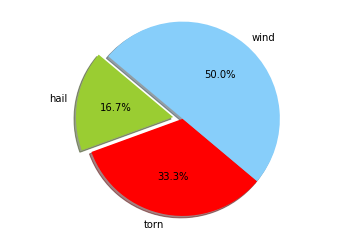

In [54]:
# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")

plt.show()

# Pie Charts for events

In [55]:
gyms = ["inj", "fat", "closs", "loss"]
members = [49, 92, 84, 53]
colors = ["yellowgreen", "red", "purple", "lightskyblue"]
explode = (0, 0.05, 0, 0)

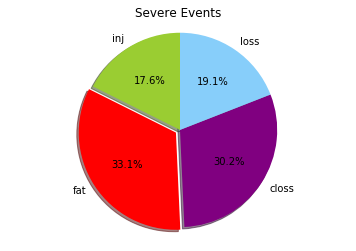

In [56]:
plt.title("Severe Events")
plt.pie(members, explode=explode, labels=gyms, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.axis("equal")
plt.show()